# BioE 101  Lab 3

## Objectives:

- Learn about sensors

- Implement and analyze voltage dividers and Wheatstone bridges for unknown
resistances

- Find Thevenin equivalent circuits

- Design logic in Python to calibrate and output pressure levels

- Determine the unknown pressure

Teams will each turn in one list of answers to the questions in this lab. List all partners’ names and section numbers.

## 1. Schedule and lab reports


-  Week 1: Commercial force sensor with Arduino
Sections 3 - 5 (Questions 1 - 9) due at the start of the second week of Lab #3

-  Week 2: DIY homemade pressure sensor
Section 6 (Questions 10 - 12) due the following week to your lab GSI at the beginning of Lab #4.

## 2. Setup
-  You and your partner should have the following items: Pressure sensor,
breadboard and jumper wire kit, two banana cables (red and black), two
alligator clips (red and black), and items of known and unknown weight.


## 3. Using the pressure sensor

-  A force-sensing resistor (FSR) is made of conductive polymer, which changes
its conductance in a predictable manner when pressure is being applied on
the surface. Typically, when we apply pressure on the active surface of a FSR,
it exhibits a decrease in resistance. Sometimes, a FSR is designed for use in
touch screens or panels on electronic devices.
The following page gives a brief explanation of how conductive polymer
works
http://en.wikipedia.org/wiki/Conductive_polymer

<br></br>
<center>
<img src="https://cdn.sparkfun.com//assets/parts/2/9/6/8/09376-1.jpg" align="center" style="height:350px" />
</center>
<br></br>

The specsheet of the FSR we use today can be found at
https://www.sparkfun.com/products/9376


<br></br>
<center>
<img src="wheatstone.png" align="center" style="height:350px" />
</center>
<br></br>


**Question 1:** What type of sensor is this? Does it give a voltage or current (or neither) output signal?


-  You will now calculate the nominal sensing resistance of your sensor. Note:
Do not use the sensing/load resistance values from the datasheet in the next
sections. Instead, calculate it empirically as follows.

-  Use your breadboard and the power supply to
build a voltage divider with your sensor and a 680k$\Omega$ resistor (anywhere from 100k$\Omega$ to 1M$\Omega$ should be fine). Wire the 5V and
ground terminals to the red/blue rails on the board, and then use those rails
for powering your circuit. Configure your voltage divider so the FSR is
connected to GND, and use an oscilloscope, multimeter or serial monitor (you have to hook up the (+) output to A0 and (-) output to GND of the Arduino.

**Question 2:** What is the resistance of your FSR with an empty falcon tube placed on the sensor? With a 10 g mass? With a 100g mass? (Fill the Falcon tube with water to vary the weights.) Show your work. Sketch and label your circuit, and write down what weight you used. Pro-Tip: To help with consistency of your measurements, tape down the FSR and let the
measurement ‘settle’ for 2-3 min to reach steady-state before recording.



## 4. Building matched resistance Wheatstone bridges

- Build a matched Wheatstone bridge with your sensor, choosing resistor
values for R1 (in the diagram below) that are as close as possible to the
steady-state resistance of your FSR with 10 g, as determined in Question 2.
It’s OK if the resistances don’t match perfectly—just try to get them as close
as you can.

<br></br>
<center>
<img src="wheatstone.png" align="center" style="height:350px" />
</center>
<br></br>


** Question 3:** Imagine that the Wheatstone bridge is actually two different voltage
dividers in parallel. Calculate the voltage at Vc and Vd. Then, assuming that zero
current passes between Vc and Vd, find an equation that describes Vout.

** Question 4:** Find an equation that describes Rs as a function of R1, Vbias, and Vout.

## 5. Data Analysis and Analog Output

- Connect Vc and Vd of your voltage divider to the A1 and A0 pin of the Arduino, respectively and connect the ground of your circuit to GND of the Arduino. Leave all other circuit elements connected as before.


**Question 5:** What is the steady state differential voltage between the two input
terminals? Remember you may have to let the voltage differential ‘settle’ for many
minutes before it reaches steady-state.



- Standard objects (50 mL Falcon tubes containing different materials) have
different weights. Determine the voltage differentials that correspond to these
weights. Place the objects on your FSR one at a time, cap facing down, and
record the differential voltage from your Wheatstone bridge. Assuming that
the weight-differential voltage relationship is linear (in reality it isn’t, but
we’ll just approximate it in a piecewise linear fashion), find the slope (change
in voltage/change in weight) and y-intercept (voltage differential with no
load).

**Question 6:** What did you find as the equation of your weight-resistance plot? Plot it in
R, Excel, etc. or use a PyPlot cell below. Note that answers may vary between groups.

In [1]:
# Run this cell first to import the necessary packages

# allows plots to be plotted right below the cell when run
%matplotlib inline 
import serial # the library for reading from serial com ports
import numpy as np # naming convention for numpy library
import matplotlib.pyplot as plt # naming convention for matplotlib

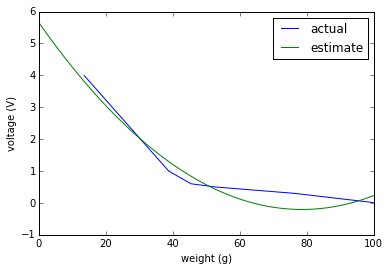

In [2]:
### ENTER YOUR VALUES HERE ###
weights = np.array([13.48, 38.77, 45.45, 52.68, 76.31, 100]) # Fill in weights here, separated by commas (ex. [13.48, 45.45, 100])
voltages = np.array([4, 1, 0.6, 0.5, 0.3, 0.01]) # Fill in output voltages here, separated by commas (ex. [1, 2, 4]) 
degree = 2 # keep this at 2, if you change it you have to change the equation for y detailed below


# Make sure both lists have the same length!


### DON'T MODIFY ANY CODE HERE, unless you want to play around with it ###
plt.figure()
"""
change the 3rd option to increase or decrease the degree of polynomial fitting; 
this creates a list of polynomial coefficients using a least squares regression model
""" 
c = np.polyfit(weights, voltages, degree) # array of coefficients, make sure to edit y afterwards
x = np.linspace(0,100, 100) # creates variable weight to iterate over
"""
this is y = anx^n + bx^(n-1) + ... + cx + d, change according to number of degrees; 
right now it's y = a*x^2 + b*x + c because deg = 2 
""" 
y = c[0]*(x**2) + c[1]*x + c[2] # c[0] is coefficent for x^n, c[1] for x^n-1, ..., c[deg] for y-int

actual, = plt.plot(weights, voltages , label="actual")
estimate, = plt.plot(x, y, label="estimate")
plt.legend(handles=[actual, estimate], loc=1)
plt.xlabel("weight (g)"); plt.ylabel("voltage (V)")


**Question 7:** Using the linear model from above, calculate the weight of the mysterious
object.

In [3]:
# If you used the above cell, you can run this code to find the value

### ENTER UNKNOWN WEIGHT VOLTAGE HERE ### 
unknown_val = 2 # enter voltage of unknown weight

### DON'T MODIFY THIS CODE, read comment for explanation on what it does ###
unknown_weight = x[np.abs(y - unknown_val).argmin()] # finds closest weight corresponding to the unknown value using linear model
print(str(unknown_weight) + ' grams' )

30.303030303 grams


**Question 8:** Find one biomedical application of force sensor, and briefly describe how it works.


You can keep your set up for next week to test your homemade pressure sensor.

## 6. Build a homemade pressure sensor
You will use two copper plate electrodes and a piece of conductive foam.

- First, cut two 2 x 2 cm electrodes from the copper plate, then solder wire leads
on to each piece. Please ask for guidance if you have not previously soldered to copper.

- Sandwich a 2 x 2 cm piece of conductive foam between the two electrodes,
then glue in place with a hot glue gun.

- The following questions will use the same techniques you applied in the first
week.


**Question 9:** What is the steady-state resistance with no load?

**Question 10:** Experimentally make a weight vs. resistance curve by measuring a few
objects of different weights. How does the resistance of the sensor change when
pressure/weight is applied?

**Question 11:** How sensitive is your device as compared to a commercial FSR? What is
the smallest detectable weight of the commercial device, and your device?

**Please wash your hands after class as the solder we use contains lead!**